# Task-5 Credit Card Fraud Detection

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# Read the dataset
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Get the information about the dataset...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Check the datatypes of each features of dataset
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
# Statistical summary of data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##  Preprocessing

In [6]:
# Check null values...
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Get the total no. of noramal transaction and Fraud transaction
df.Class.value_counts()

# 0 -> Normal transaction
# 1 -> Fraud transaction

Class
0    284315
1       492
Name: count, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='count'>

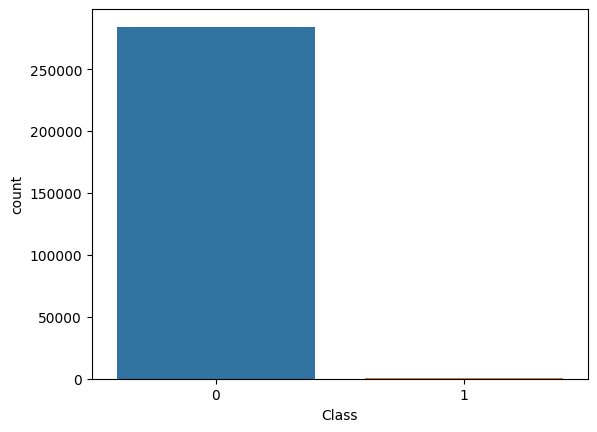

In [8]:
# Visualize the distribution of normal & fraud transactions...
sns.countplot(x="Class",data=df)

### Observations : 
        The no. of fraud transactions is very less as compared to normal transactions in given data.

In [9]:
# Separate the fraud and normal data...

normal_df=df[df["Class"]==0]
fraud_df=df[df["Class"]==1]

In [10]:
normal_df.shape
# the size of normal transactions is very large

(284315, 31)

In [11]:
fraud_df.shape

(492, 31)

In [12]:
normal_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# Compare the value of both the transactions...
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
# Make a sample dataset so that distribution of both the transactions are in equal size...
# the size of fraud dataset is 492 rows so we need 492 rows of normal transactions to make it balanced.

normal_sample=normal_df.sample(492)
normal_sample.shape, fraud_df.shape

((492, 31), (492, 31))

In [16]:
# Combine both the dataframes
final_df=pd.concat([normal_sample,fraud_df],ignore_index=True)
final_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,154717.0,-2.770269,-4.459594,-3.016358,-0.111461,-3.439970,4.161964,6.669701,-0.128020,-1.022271,...,1.394502,0.906156,4.021539,-1.120555,0.401221,0.741967,-0.635853,0.088294,1786.5,0
1,164044.0,-2.001444,-1.084340,0.042545,-1.061416,1.004215,2.054346,2.173900,0.347613,-0.991819,...,0.699938,1.070446,0.585468,-0.922432,1.156154,0.683653,-0.197059,0.055466,492.0,0
2,61735.0,1.340316,-0.455276,-0.131421,-0.698706,-0.748926,-1.195305,-0.129257,-0.251136,-1.345200,...,0.264935,0.574379,-0.167771,0.577113,0.707449,-0.116392,-0.041062,-0.002698,40.0,0
3,134983.0,1.902486,-0.504231,-0.331407,0.608915,-0.849905,-0.732520,-0.511422,-0.094086,1.079986,...,0.215386,0.641814,0.141407,0.075848,-0.318250,0.349741,-0.024527,-0.035947,56.0,0
4,165980.0,-0.268232,-1.050883,0.450619,-2.493400,-0.488337,-0.679901,-0.035500,-0.445045,-1.802856,...,0.069334,0.961369,-0.068351,0.041737,-1.261449,-0.343053,-0.033980,0.024126,93.5,0


In [17]:
final_df.shape

(984, 31)

In [18]:
final_df["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

## Exploratory Data Analysis

<AxesSubplot: xlabel='Class', ylabel='count'>

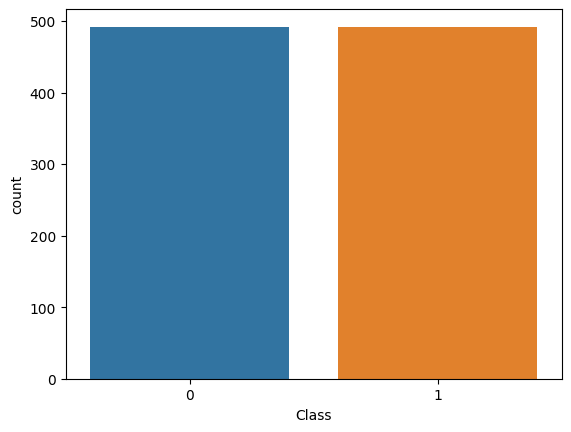

In [19]:
# Now Visualize the distribution of the transactions...
sns.countplot(x="Class",data=final_df)

<AxesSubplot: xlabel='Amount', ylabel='Density'>

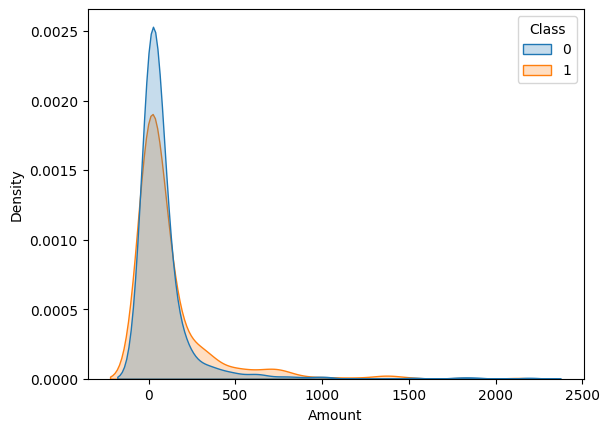

In [20]:
# Visualize the relation between the amount and class...
sns.kdeplot(x="Amount",hue="Class",fill=True,data=final_df)

Now our Data is ready for train the model!

## Split the data

In [21]:
X=final_df.drop("Class",axis=1)
Y=final_df["Class"]

X.shape , Y.shape

((984, 30), (984,))

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.70,random_state=11)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((688, 30), (296, 30), (688,), (296,))

## Train the Model

In [23]:
# Logistic Regression...
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
y_pred

print("Performance of the model")
print("Accuracy :",round(metrics.accuracy_score(y_test,y_pred)*100,4))
print("Precision score:",round(metrics.precision_score(y_test,y_pred)*100,4))
print("Recall Score :",round(metrics.recall_score(y_test,y_pred)*100,4))
print("F1 Score :",round(metrics.f1_score(y_test,y_pred)*100,4))
print("Confusion Metrix :",metrics.confusion_matrix(y_test,y_pred))

Performance of the model
Accuracy : 94.9324
Precision score: 97.7941
Recall Score : 91.7241
F1 Score : 94.6619
Confusion Metrix : [[148   3]
 [ 12 133]]


In [24]:
# Random Forest Classifier...
model2=RandomForestClassifier()
model2.fit(X_train,y_train)
y2_pred=model2.predict(X_test)

print("Performance of the model")
print("Accuracy :",round(metrics.accuracy_score(y_test,y2_pred)*100,4))
print("Precision score:",round(metrics.precision_score(y_test,y2_pred)*100,4))
print("Recall Score :",round(metrics.recall_score(y_test,y2_pred)*100,4))
print("F1 Score :",round(metrics.f1_score(y_test,y2_pred)*100,4))
print("Confusion Metrix :",metrics.confusion_matrix(y_test,y2_pred))

Performance of the model
Accuracy : 94.5946
Precision score: 96.4029
Recall Score : 92.4138
F1 Score : 94.3662
Confusion Metrix : [[146   5]
 [ 11 134]]


# Thanks!